## **ASSIGNMENT 2**
TOPIC: Data exploration and Visualization

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
df=pd.read_csv('/earthquake.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,02/01/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,04/01/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,05/01/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,08/01/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,09/01/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## 1. Clean and perform steps of Wrangling. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [ ]:
#filling NaN value
df.fillna(0)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,02/01/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,0.0,0.0,6.0,MW,0.000,0.0,0.00,0.000,0.0,0.0000,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,04/01/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,0.0,0.0,5.8,MW,0.000,0.0,0.00,0.000,0.0,0.0000,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,05/01/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,0.0,0.0,6.2,MW,0.000,0.0,0.00,0.000,0.0,0.0000,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,08/01/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,0.0,0.0,5.8,MW,0.000,0.0,0.00,0.000,0.0,0.0000,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,09/01/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,0.0,0.0,5.8,MW,0.000,0.0,0.00,0.000,0.0,0.0000,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,8:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,0.0,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,9:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,0.0,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,0.0,5.9,MWW,0.000,0.0,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,0.0,6.3,MWW,0.000,0.0,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [ ]:
#evaluate the missing data
df.isnull()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
23408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
23409,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False
23410,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False


In [ ]:
#describe
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [ ]:
a=df.drop(columns=['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error'])
print(a)

             Date      Time  ...  Magnitude Source     Status
0      02/01/1965  13:44:18  ...            ISCGEM  Automatic
1      04/01/1965  11:29:49  ...            ISCGEM  Automatic
2      05/01/1965  18:05:58  ...            ISCGEM  Automatic
3      08/01/1965  18:49:43  ...            ISCGEM  Automatic
4      09/01/1965  13:32:50  ...            ISCGEM  Automatic
...           ...       ...  ...               ...        ...
23407  12/28/2016   8:22:12  ...                NN   Reviewed
23408  12/28/2016   9:13:47  ...                NN   Reviewed
23409  12/28/2016  12:38:51  ...                US   Reviewed
23410  12/29/2016  22:30:19  ...                US   Reviewed
23411  12/30/2016  20:08:28  ...                US   Reviewed

[23412 rows x 14 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

**INFERANCE:** In the Earthquate dataset we have performed the **EDA and wrangling**. The dataset does contain empty sets so, i have set the **fillna** function to fill the empty columns also, i decided to **drop** few required columns. 

**2. Depict the shape w.r.t skewness in magnitude and
visualize its  correlation with various attributes of data.**

In [ ]:
df['Magnitude'].shape

(23412,)

In [ ]:
A=df['Magnitude'].skew
A

<bound method Series.skew of 0        6.0
1        5.8
2        6.2
3        5.8
4        5.8
        ... 
23407    5.6
23408    5.5
23409    5.9
23410    6.3
23411    5.5
Name: Magnitude, Length: 23412, dtype: float64>

In [ ]:
B=df['Magnitude'].var()
B

0.17898453516966728

In [ ]:
C=df['Magnitude'].kurtosis()
C

4.388922062457994

**Inferance:**
   functions   :              size
1.  shape()    : (23412,)
2.  df.skew    : Name: Magnitude, Length: 23412, dtype: float64>
3.  df.var()   : 0.17898453516966728
4.  df.kurtosis: 4.388922062457994

           Longitude  Magnitude  Latitude     Depth
Longitude   1.000000   0.038579  0.203546 -0.085861
Magnitude   0.038579   1.000000  0.034987  0.023457
Latitude    0.203546   0.034987  1.000000 -0.081020
Depth      -0.085861   0.023457 -0.081020  1.000000


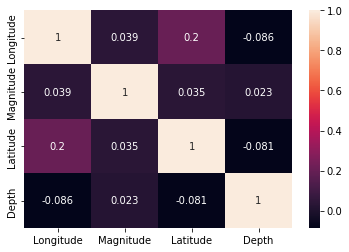

In [ ]:
#visualisation of Correlation 
import seaborn as sns
correlation=df[['Longitude','Magnitude','Latitude','Depth']].corr()
print(correlation)
sns.heatmap(correlation, annot=True)

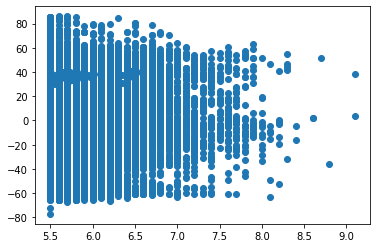

In [ ]:
#scatter plot of most correlated features
x=df['Magnitude']
y=df['Latitude']
plt.scatter(x,y)
plt.show()

**INFERANCE:**
Here latitude and magnitude are both highly correlated

              Longitude  Magnitude    Latitude         Depth
Longitude  15753.251728   2.048516  769.316657  -1321.767854
Magnitude      2.048516   0.178985    0.445723      1.217195
Latitude     769.316657   0.445723  906.803784   -299.241208
Depth      -1321.767854   1.217195 -299.241208  15043.488013


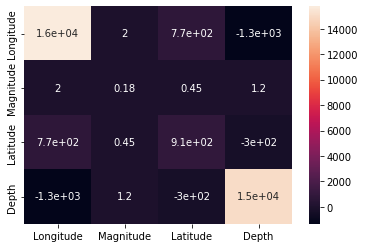

In [ ]:
#Covariance
covr=df[['Longitude','Magnitude','Latitude','Depth']].cov()
print(covr)
sns.heatmap(covr, annot=True)

**Inferance:** here magnitude and latitude shows high covariance 

In [ ]:
#PIVOT TABLE
pd.pivot_table(df,columns=df[['Longitude','Magnitude','Latitude','Depth']])

Longitude                  -179.997 -179.996  ...  179.998        
Magnitude                       6.2      5.6  ...      6.2     6.8
Latitude                    -31.566  -23.495  ...  -30.965 -31.160
Depth                         392.3    542.6  ...    416.7   369.4
Azimuthal Gap                   NaN     16.7  ...    17.20     NaN
Depth Error                     NaN      NaN  ...     5.60     NaN
Depth Seismic Stations          NaN    222.0  ...   296.00     NaN
Horizontal Distance             NaN      NaN  ...      NaN     NaN
Horizontal Error                NaN      NaN  ...      NaN     NaN
Magnitude Error                 NaN      NaN  ...      NaN     NaN
Magnitude Seismic Stations      NaN      NaN  ...      NaN     NaN
Root Mean Square                1.2      0.8  ...     1.36    1.02

[8 rows x 17549 columns]

**INFERANCE:** The pivot table shows relation wrt rows and columns.

**3. Perform some aspects of exploration.**

In [ ]:
df.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [ ]:
df.mean()

Latitude                        1.679033
Longitude                      39.639961
Depth                          70.767911
Depth Error                     4.993115
Depth Seismic Stations        275.364098
Magnitude                       5.882531
Magnitude Error                 0.071820
Magnitude Seismic Stations     48.944618
Azimuthal Gap                  44.163532
Horizontal Distance             3.992660
Horizontal Error                7.662759
Root Mean Square                1.022784
dtype: float64

In [ ]:
df.max()

Date                          2011-03-13T02:23:34.520Z
Time                                           9:59:57
Latitude                                        86.005
Longitude                                      179.998
Type                                        Rock Burst
Depth                                              700
Depth Error                                     91.295
Depth Seismic Stations                             934
Magnitude                                          9.1
Magnitude Error                                   0.41
Magnitude Seismic Stations                         821
Azimuthal Gap                                      360
Horizontal Distance                             37.874
Horizontal Error                                    99
Root Mean Square                                  3.44
ID                                          UW10530748
Source                                              UW
Location Source                                    WEL
Magnitude 

In [ ]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['Magnitude'])
h = sorted(h)
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 

In [ ]:
mean=df['Magnitude'].mean()
print(mean)

5.882530753460003


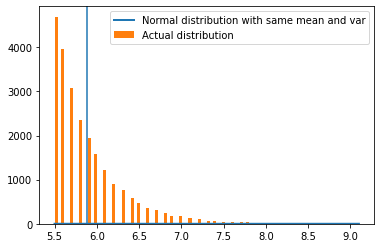

In [ ]:
#mean
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,density=False,bins = 100,label="Actual distribution") 
plt.axvline(mean)
plt.legend()
plt.show() 

In [ ]:
med=df['Magnitude'].median()
print(med)

5.7


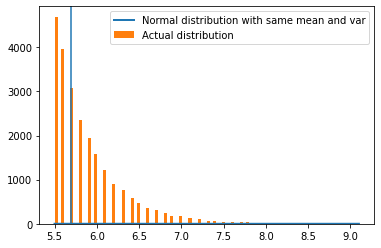

In [ ]:
#plot median
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,density=False,bins = 100,label="Actual distribution") 
plt.axvline(med)
plt.legend()
plt.show() 

In [ ]:
o=df['Magnitude']
mode=stats.mode(o)
print(mode)

ModeResult(mode=array([5.5]), count=array([4685]))


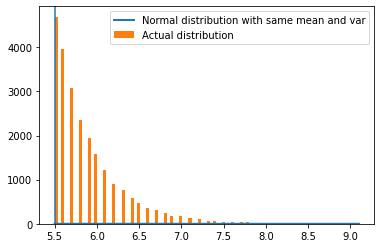

In [ ]:
#mode
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,density=False,bins = 100,label="Actual distribution")
mode=stats.mode(o) 
plt.axvline(mode[0])
plt.legend()
plt.show() 

**INFERANCE**  The mean line is at the extreme right whereas mode is to the left of median. so its **right skewed curve distribution**

 **4. Visualize the count of Nuclear explosion by year and
the  maximum occurrence w.r.t year.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


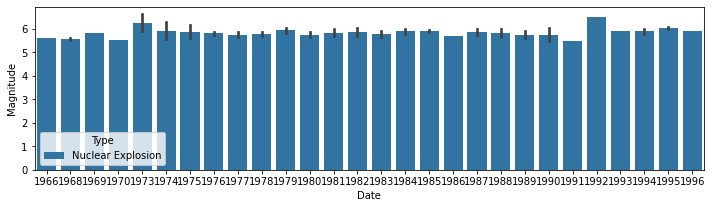

In [ ]:
#occurance of earthquate wrt hours
df1=df[df['Type']=='Nuclear Explosion']
df1['Date']=pd.to_datetime(df1['Date'])
df1['yyyy'] = pd.to_datetime(df1['Date']).dt.year
df1['yyyy']
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(x=df1['Date'].dt.year,y=df1['Magnitude'],hue=df1['Type'])
plt.show()

**inferance:** barplots of magnitude wrt date(year). here 1992 shows highest Nuclear explosion

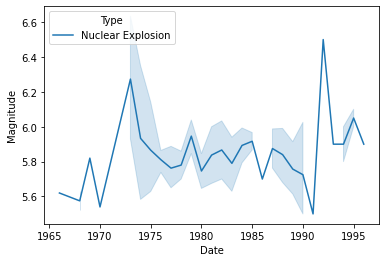

In [ ]:
sns.lineplot(x=df1['Date'].dt.year,y=df1['Magnitude'],hue=df1['Type'])

**Inferance:** nuclear explosion during 1990 to 1995 is highest

**5.Visualize the count w.r.t Source, Type and Magnitude Source.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

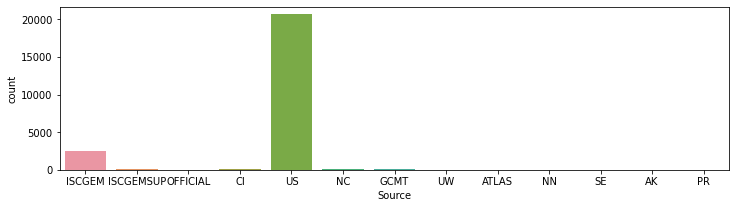

In [ ]:
#source
fig, axes = plt.subplots(figsize=(12,3))
sns.countplot(x='Source',data=df)

**Inferance:** the counts show some values for ISCGEM, ISCGEMSUP, CL ,US, NC and GCMT. Counts for US is highest here

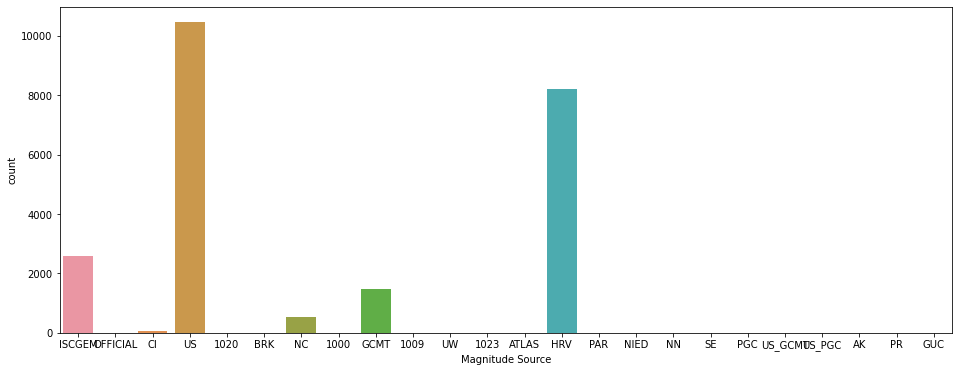

In [ ]:
fig, axes = plt.subplots(figsize=(16,6))
sns.countplot(x='Magnitude Source',data=df)

**INFERANCE** : counts show some values for ISCGEM , CL, US , NC , GCMT and HRV counts for US is highest here

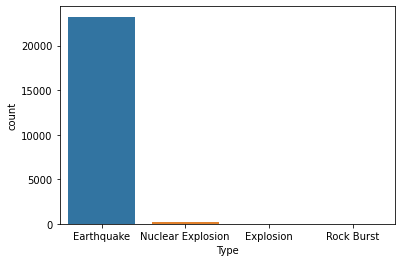

In [ ]:
sns.countplot(x='Type',data=df)

**Inferance:** Counts show here some values for earthquake and nuchear explosion. Counts for Earthquake is highest here.